1. Giới thiệu

Trong những năm gần đây, các vấn đề liên quan đến sức khỏe cộng đồng ngày càng trở nên nghiêm trọng, đặc biệt là các bệnh lý mạn tính xuất phát từ lối sống và thói quen sinh hoạt hằng ngày. Nhiều nghiên cứu cho thấy, phần lớn các nguy cơ sức khỏe hoàn toàn có thể được dự đoán và phòng ngừa sớm nếu con người hiểu rõ các yếu tố ảnh hưởng và có những điều chỉnh phù hợp trong sinh hoạt.

Với sự phát triển của khoa học dữ liệu và học máy, việc khai thác dữ liệu sức khỏe để phát hiện các xu hướng, mối quan hệ tiềm ẩn và xây dựng các mô hình dự đoán đã trở thành một hướng tiếp cận hiệu quả trong việc hỗ trợ chăm sóc và phòng ngừa sức khỏe. Thông qua dữ liệu, chúng ta không chỉ quan sát được tình trạng hiện tại mà còn có thể dự đoán rủi ro trong tương lai.

Chính vì vậy, bài tập lớn này tập trung vào việc khai phá dữ liệu (Exploratory Data Analysis – EDA) và huấn luyện mô hình học máy nhằm dự đoán rủi ro sức khỏe của con người dựa trên các yếu tố liên quan đến lối sống và tình trạng sức khỏe tổng quát. Bộ dữ liệu được thu thập từ nhiều nhóm tuổi, nghề nghiệp và thói quen sinh hoạt khác nhau, giúp cung cấp một cái nhìn đa chiều về mối liên hệ giữa các đặc trưng này và mức độ rủi ro sức khỏe.

Trong quá trình thực hiện, bài tập lớn sẽ sử dụng các phương pháp thống kê mô tả và trực quan hóa dữ liệu để khám phá đặc điểm của bộ dữ liệu, sau đó áp dụng các mô hình học máy phù hợp để huấn luyện và đánh giá khả năng dự đoán rủi ro sức khỏe. Kết quả của bài tập không chỉ giúp hiểu rõ hơn các yếu tố ảnh hưởng đến sức khỏe mà còn minh họa cách ứng dụng dữ liệu vào các bài toán dự đoán trong thực tế.

2. Khai báo thư viện

In [25]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px




# Cấu hình đẹp biểu đồ
plt.rcParams["figure.figsize"] = (8, 5)
sns.set_theme(style="whitegrid")


3. Đọc file dữ liệu 

In [26]:
df = pd.read_csv("Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv")




In [27]:
df.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high


- **age** → Tuổi  
- **weight** → Cân nặng (kg)  
- **height** → Chiều cao (cm)  
- **exercise** → Mức độ vận động / tập thể dục  
- **sleep** → Thời gian ngủ trung bình mỗi ngày (giờ)  
- **sugar_intake** → Mức tiêu thụ đường  
- **smoking** → Tình trạng hút thuốc  
- **alcohol** → Mức độ sử dụng rượu/bia  
- **married** → Tình trạng hôn nhân  
- **profession** → Nghề nghiệp  
- **bmi** → Chỉ số khối cơ thể (BMI)  
- **health_risk** → Mức độ rủi ro sức khỏe  


In [28]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


**Không có giá trị thiếu (non-null 100%) ở tất cả các cột**

In [45]:
# Chuyển toàn bộ cột object sang categorical
obj_cols = df.select_dtypes(include='object').columns

df[obj_cols] = df[obj_cols].astype('category')

# Kiểm tra lại
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           5000 non-null   float64 
 1   weight        5000 non-null   float64 
 2   height        5000 non-null   float64 
 3   exercise      5000 non-null   category
 4   sleep         5000 non-null   float64 
 5   sugar_intake  5000 non-null   category
 6   smoking       5000 non-null   category
 7   alcohol       5000 non-null   category
 8   married       5000 non-null   category
 9   profession    5000 non-null   category
 10  bmi           5000 non-null   float64 
 11  health_risk   5000 non-null   category
dtypes: category(7), float64(5)
memory usage: 230.8 KB


In [29]:
df.describe()

,age,weight,height,sleep,bmi
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,48.805600,77.359200,171.933200,6.997060,26.84388
std,17.906991,18.714567,15.822225,1.432849,8.25249
min,18.000000,45.000000,145.000000,3.000000,11.40000
25%,34.000000,61.000000,158.000000,6.000000,20.30000
50%,49.000000,77.000000,171.500000,7.000000,26.00000
75%,64.000000,94.000000,186.000000,8.000000,32.40000
max,79.000000,109.000000,199.000000,10.000000,51.40000


**Ta thấy cột height là một cột không quan trọng thường không ảnh hưởng tới việc dự đoán nên ta sẽ bỏ cột này đi**

In [ ]:
df = df.drop(columns=['height'])
df.columns

Index(['age', 'weight', 'exercise', 'sleep', 'sugar_intake', 'smoking',
       'alcohol', 'married', 'profession', 'bmi', 'health_risk'],
      dtype='object')

4. Biểu đồ hóa từng loại dữ liệu

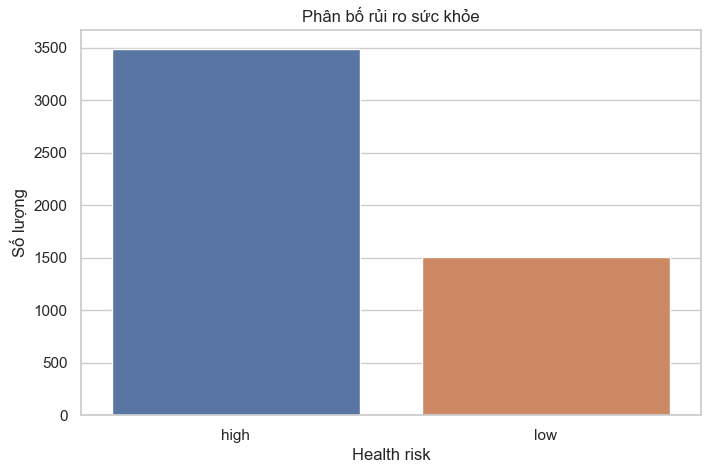

In [52]:
sns.countplot(data=df, x="health_risk", hue="health_risk")
plt.title("Phân bố rủi ro sức khỏe")
plt.xlabel("Health risk")
plt.ylabel("Số lượng")
plt.show()

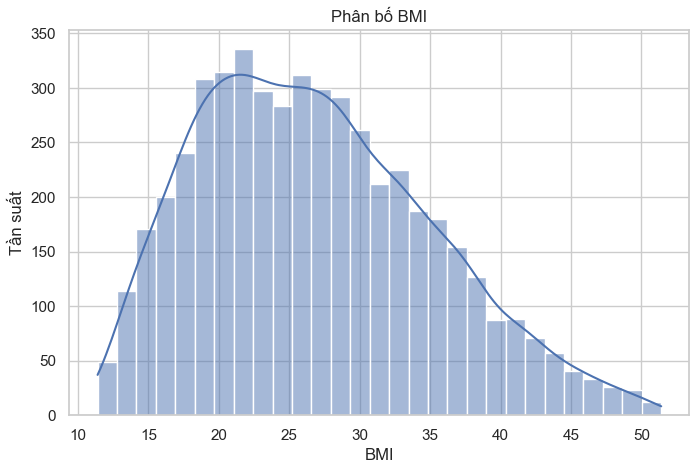

In [53]:
sns.histplot(data=df, x="bmi", kde=True)
plt.title("Phân bố BMI")
plt.xlabel("BMI")
plt.ylabel("Tần suất")
plt.show()


C:\Users\VAM2019\AppData\Local\Temp\ipykernel_6400\3749695102.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


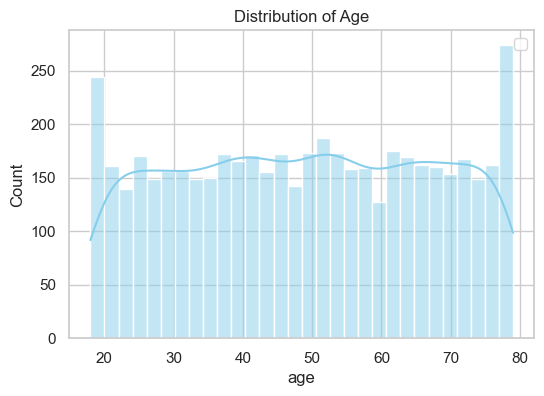

In [54]:
plt.figure(figsize=(6,4))
sns.histplot(df["age"], kde=True, bins=30, color="skyblue")
plt.xlabel("age")
plt.title("Distribution of Age")
plt.legend()
plt.show()


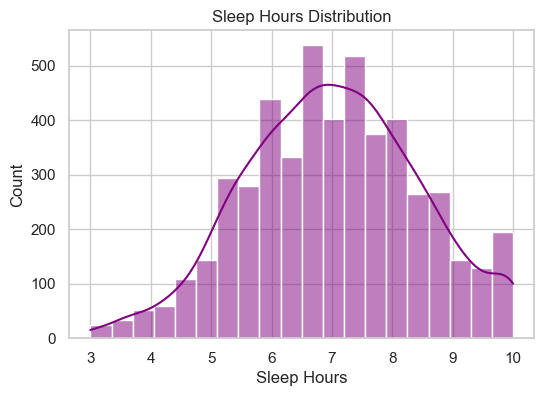

In [55]:
plt.figure(figsize=(6,4))
sns.histplot(df["sleep"], kde=True, bins=20, color="purple")
plt.xlabel("Sleep Hours")
plt.title("Sleep Hours Distribution")
plt.show()

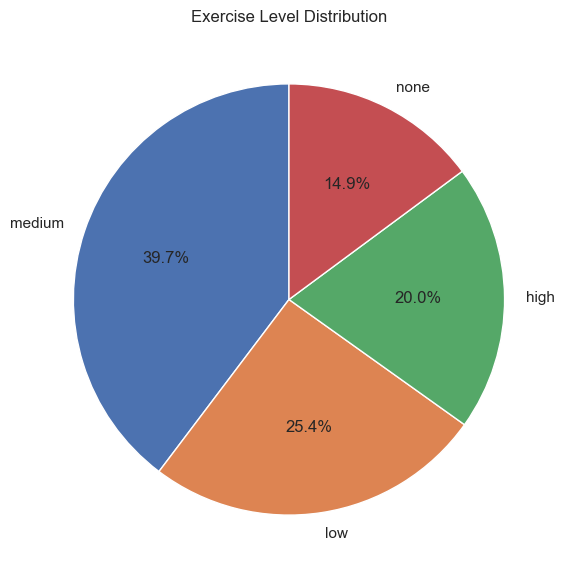

In [56]:
plt.figure(figsize=(7,7))
df['exercise'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Exercise Level Distribution")
plt.ylabel("")
plt.show()


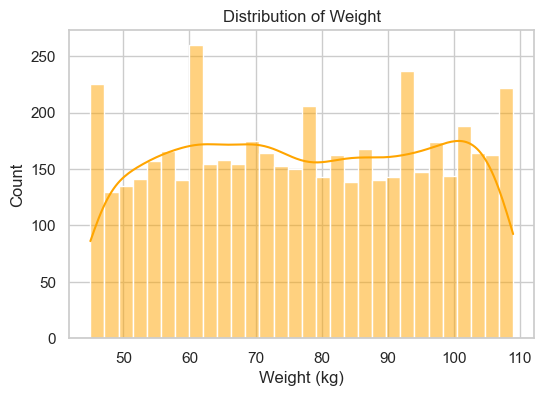

In [57]:
plt.figure(figsize=(6,4))
sns.histplot(df["weight"], kde=True, bins=30, color="orange")
plt.xlabel("Weight (kg)")
plt.title("Distribution of Weight")
plt.show()

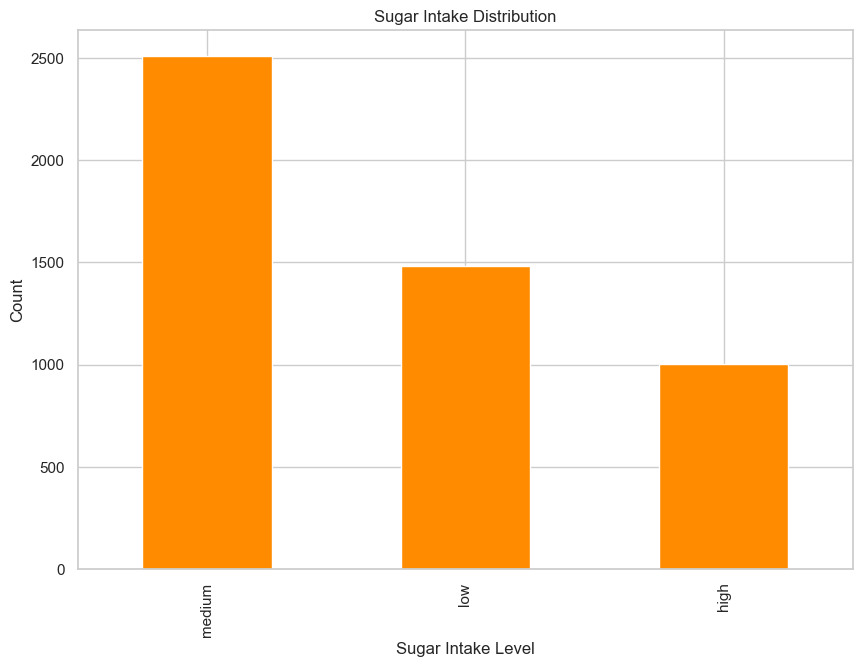

In [58]:
plt.figure(figsize=(10, 7))
df['sugar_intake'].value_counts().plot(kind='bar', color='darkorange')
plt.xlabel("Sugar Intake Level")
plt.ylabel("Count")
plt.title("Sugar Intake Distribution")
plt.show()

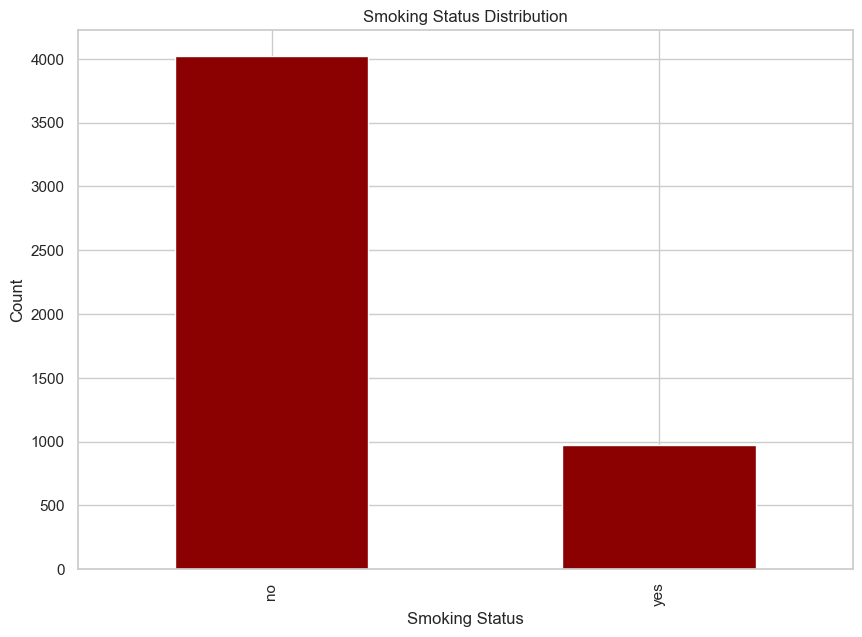

In [59]:
plt.figure(figsize=(10, 7))
df['smoking'].value_counts().plot(kind='bar', color='darkred')
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.title("Smoking Status Distribution")
plt.show()


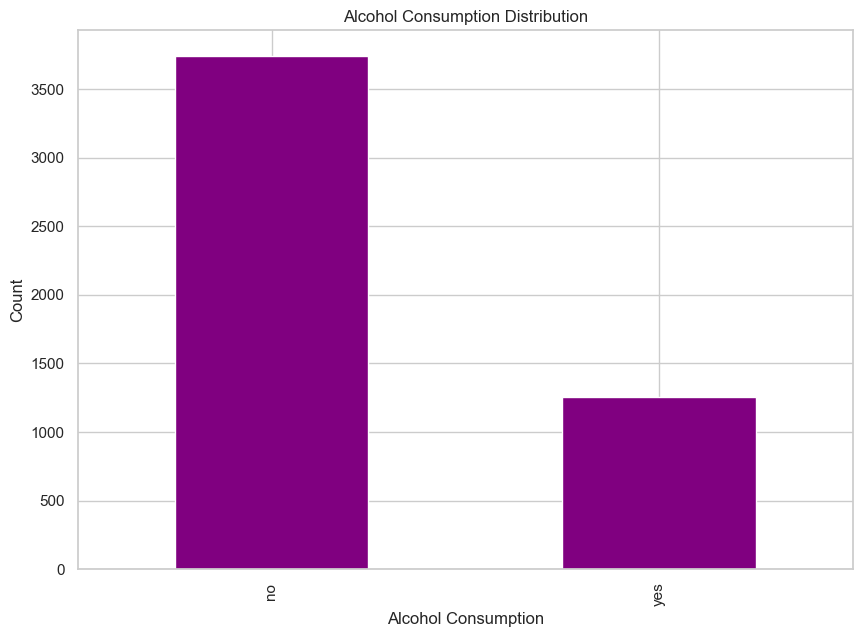

In [60]:
plt.figure(figsize=(10, 7))
df['alcohol'].value_counts().plot(kind='bar', color='purple')
plt.xlabel("Alcohol Consumption")
plt.ylabel("Count")
plt.title("Alcohol Consumption Distribution")
plt.show()


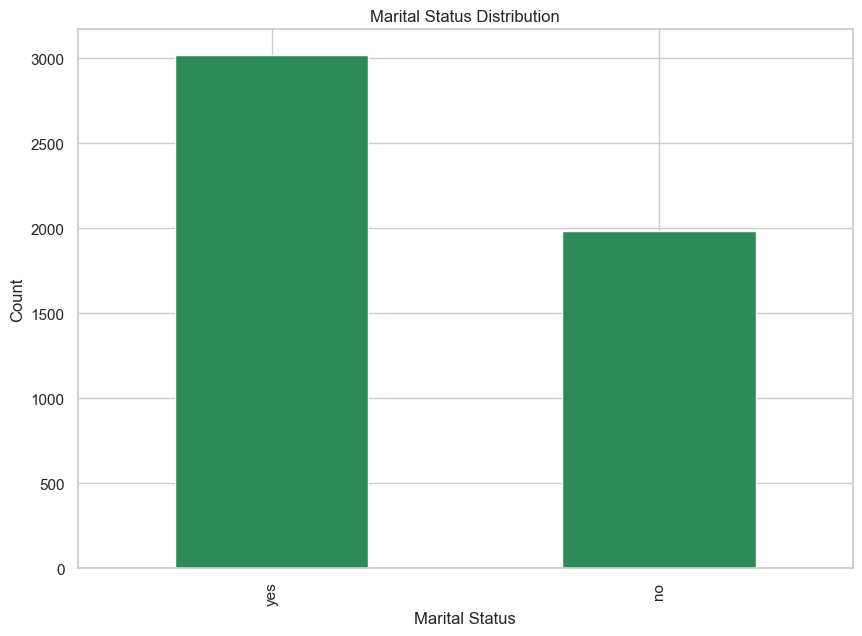

In [61]:
plt.figure(figsize=(10, 7))
df['married'].value_counts().plot(kind='bar', color='seagreen')
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Marital Status Distribution")
plt.show()


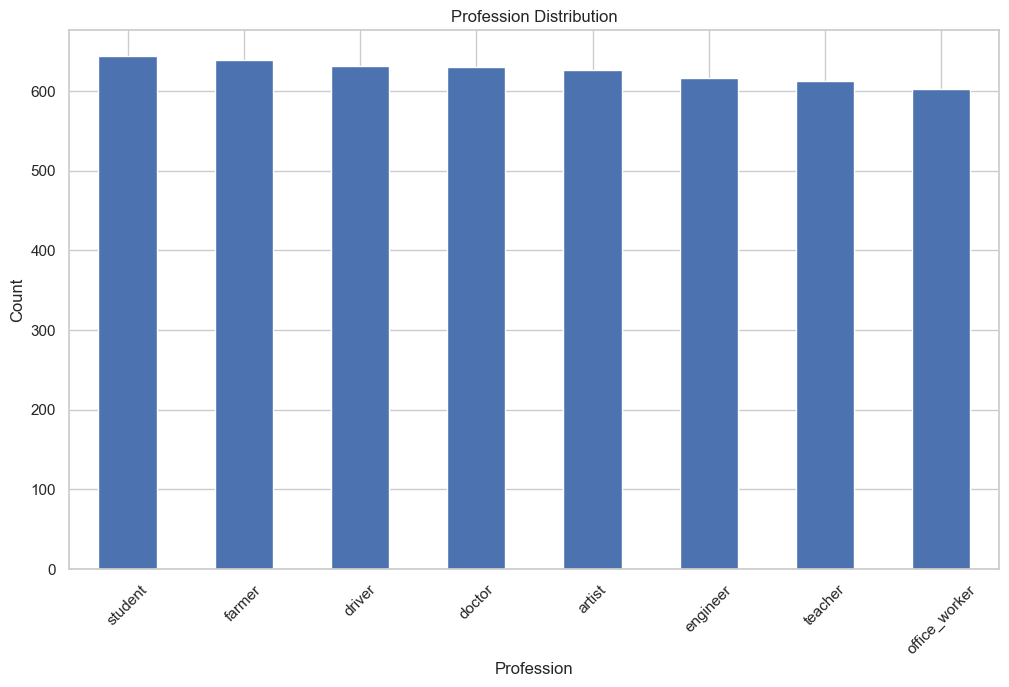

In [62]:
plt.figure(figsize=(12, 7))
df['profession'].value_counts().plot(kind='bar')
plt.xlabel("Profession")
plt.ylabel("Count")
plt.title("Profession Distribution")
plt.xticks(rotation=45)
plt.show()


<p style="color: green; font-size: 24px">
   5. Exploratory Data Analysis (EDA)
</p>


<p style="color: black; font-size: 20px">
5.1 . Tương quan các đặc trưng với cột phân loại
</p>

<p style="color: red; font-size: 25px;text-align:center">
Đặc trưng numeric
</p>

In [74]:
num_cols = df.select_dtypes(include='float64').columns.tolist()
num_cols


['age', 'weight', 'sleep', 'bmi']

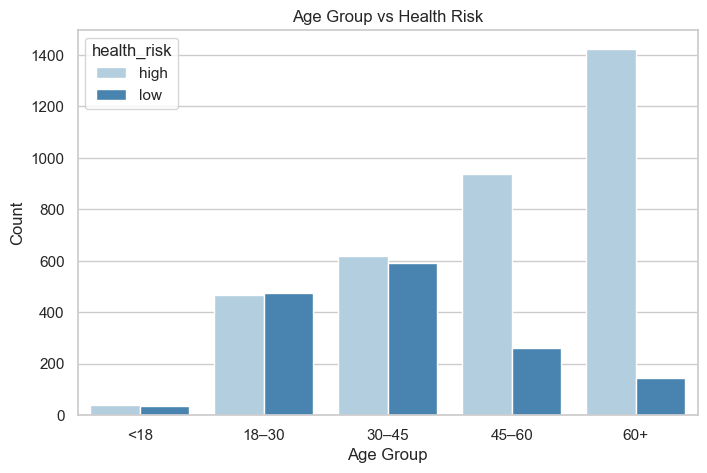

In [70]:

df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 18, 30, 45, 60, 100],
    labels=['<18', '18–30', '30–45', '45–60', '60+']
)

sns.countplot(
    data=df,
    x='age_group',
    hue='health_risk',
    palette='Blues'
)
plt.title('Age Group vs Health Risk')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()



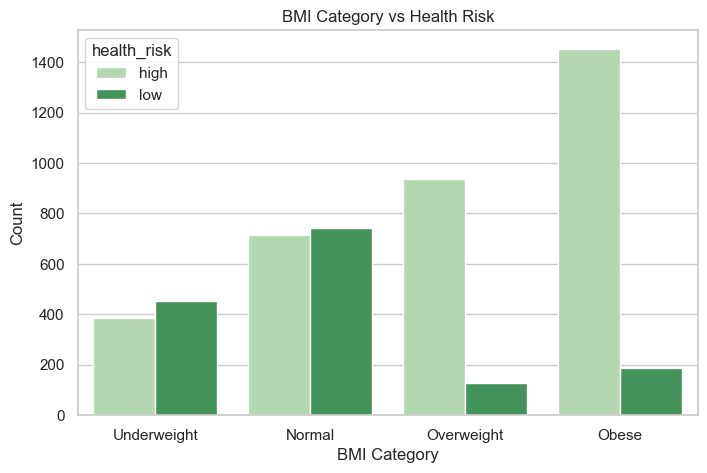

In [71]:
df['bmi_group'] = pd.cut(
    df['bmi'],
    bins=[0, 18.5, 25, 30, 100],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

sns.countplot(
    data=df,
    x='bmi_group',
    hue='health_risk',
    palette='Greens'
)
plt.title('BMI Category vs Health Risk')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()


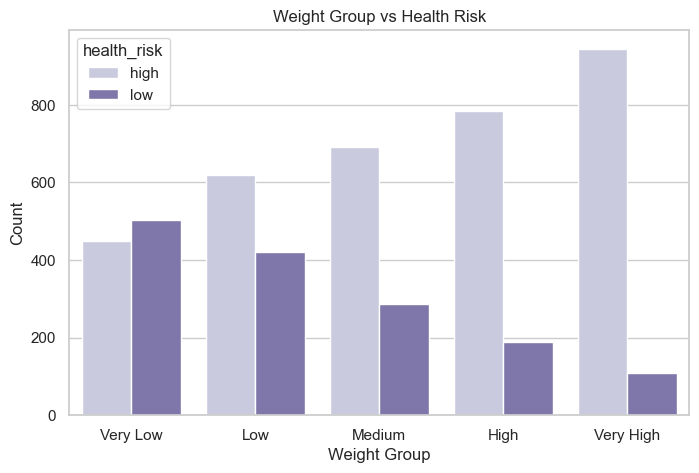

In [72]:
df['weight_group'] = pd.cut(
    df['weight'],
    bins=5,   # tự động chia 5 nhóm
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

sns.countplot(
    data=df,
    x='weight_group',
    hue='health_risk',
    palette='Purples'
)
plt.title('Weight Group vs Health Risk')
plt.xlabel('Weight Group')
plt.ylabel('Count')
plt.show()


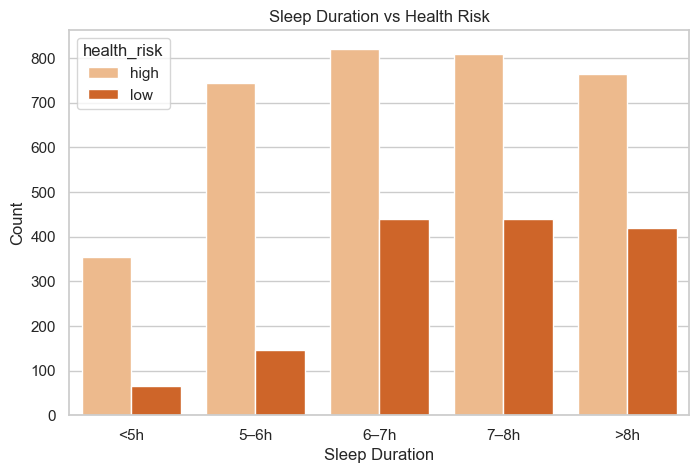

In [73]:
df['sleep_group'] = pd.cut(
    df['sleep'],
    bins=[0, 5, 6, 7, 8, 24],
    labels=['<5h', '5–6h', '6–7h', '7–8h', '>8h']
)

sns.countplot(
    data=df,
    x='sleep_group',
    hue='health_risk',
    palette='Oranges'
)
plt.title('Sleep Duration vs Health Risk')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.show()


<p ><span style="color:blue;font-size:25;font-weight:600">Nhận xét: </span>Age (Tuổi).
Kết quả phân tích cho thấy nguy cơ sức khỏe có xu hướng tăng theo độ tuổi. Ở các nhóm tuổi trẻ, số lượng cá nhân thuộc nhóm rủi ro cao và thấp tương đối cân bằng, trong khi  từ nhóm trung niên trở lên, số lượng cá nhân có mức rủi ro cao tăng rõ rệt. Điều này cho thấy tuổi là một yếu tố quan trọng, có mối liên hệ thuận chiều với rủi ro sức khỏe.

BMI (Chỉ số khối cơ thể).
BMI thể hiện mối liên hệ rất rõ ràng với biến phân loại rủi ro sức khỏe. Các nhóm có BMI thấp hoặc bình thường chủ yếu thuộc nhóm rủi ro thấp, trong khi các nhóm thừa cân và béo phì có tỷ lệ rủi ro cao vượt trội. Kết quả này khẳng định BMI là đặc trưng dạng số có ảnh hưởng mạnh nhất trong bộ dữ liệu.

Weight (Cân nặng).
Khi phân tích theo nhóm cân nặng, có thể nhận thấy nguy cơ sức khỏe tăng dần khi cân nặng tăng. Ở các nhóm cân nặng thấp, rủi ro thấp vẫn chiếm tỷ lệ đáng kể, nhưng từ mức trung bình trở lên, số lượng cá nhân thuộc nhóm rủi ro cao gia tăng rõ rệt. Tuy nhiên, ảnh hưởng của cân nặng riêng lẻ thấp hơn BMI do BMI đã tổng hợp thông tin từ nhiều yếu tố cơ thể.

Sleep Duration (Thời gian ngủ).
Thời gian ngủ cho thấy mối quan hệ phi tuyến với rủi ro sức khỏe. Những cá nhân ngủ quá ít có tỷ lệ rủi ro cao lớn hơn, trong khi nhóm ngủ với thời lượng vừa phải có xu hướng giảm nguy cơ. Tuy nhiên, việc ngủ quá nhiều cũng không làm giảm rủi ro đáng kể, cho thấy tồn tại một khoảng thời gian ngủ tối ưu cho sức khỏe.</p>